In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
df = df.drop(["User ID", "Gender"], axis = 1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [8]:
from sklearn.svm import SVC

In [9]:
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.93

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix

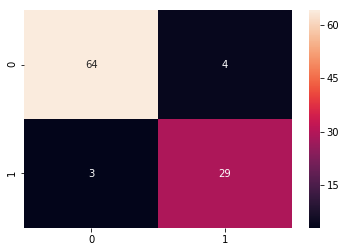

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

Text(0.5, 1.0, 'SVM Classifier Kernel = "Gaussian" (Testing Data)')

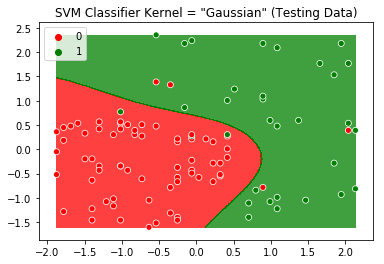

In [13]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             cmap = ListedColormap(("red", "green")), alpha = 0.75)
sns.scatterplot(X_test[:, 0], X_test[:, 1], palette = {0: "red", 1: "green"}, hue = y_test)
plt.title("SVM Classifier Kernel = \"Gaussian\" (Testing Data)")

Text(0.5, 1.0, 'SVM Classifier Kernel = "Gaussian" (Training Data)')

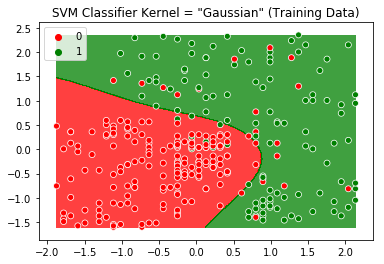

In [14]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             cmap = ListedColormap(("red", "green")), alpha = 0.75)
sns.scatterplot(X_set[:, 0], X_set[:, 1], palette = {0: "red", 1: "green"}, hue = y_train)
plt.title("SVM Classifier Kernel = \"Gaussian\" (Training Data)")